In [34]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import googletrans
from googletrans import Translator
heart = pd.read_csv("wow.csv")
heart

,Timestamp,Apakah anda mengetahui produk indihome?,Apakah anda menggunakan atau berlangganan produk indihome?,Berapa kecepatan layanan indihome yang anda gunakan?,Apakah kecepatan jaringan indihome sesuai dengan harga yang ditawarkan?,Apakah selama anda menggunakan layanan indihome pernah mengalami kendala?,Seberapa sering anda mengalami kendala pada jaringan indihome?,"Jika iya, kendala apa yang dialami?","Ketika anda mengalami kendala jaringan, seberapa cepat petugas indihome melakukan perbaikan?",Apakah anda puas dengan layanan perbaikan kendala jaringan yang dilakukan oleh petugas indihome?,...,"Jika iya, produk competitor apa yang pernah anda berlangganan?","Dari segi harga, apakah produk lain yang pernah anda gunakan lebih terjangkau?","Jika iya, apakah dengan harga yang lebih terjangkau yang ditawarkan produk lain, anda tetap berlangganan dengan indihome?",Apa alasan anda tetap ingim berlangganan produk indihome?,Apakah anda mengetahui telkomsel orbit?,Apakah ditempat anda terjangkau telkomsel orbit?,Apakah anda menggunakan telkomsel orbit?,"Jika iya, bagaimana kualitas telkomsel orbit dibanding dengan produk competitor lainnya?",Apakah harga yang ditawarkan telkomsel orbit masih terjangkau?,Kendala apa saja yang anda alami selama menggunakan telkomsel orbit?
0,2021/07/28 8:42:25 pm GMT+7,Ya,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Tidak,NaN,NaN,NaN,NaN,NaN
1,2021/07/28 8:44:18 pm GMT+7,Ya,Ya,10 Mbps,Ya,Ya,Jarang,"Kendala sinyal suka mati /loss tiba2, sinyal t...",Satu kali 24 jam,Ya,...,Nope,Ya,Ya,terjangkau dan mudah untuk service,Tidak,NaN,NaN,NaN,NaN,NaN
2,2021/07/28 8:45:14 pm GMT+7,Ya,Ya,10 Mbps,Mungkin,Ya,Mungkin sebulan sekali,"Koneksi terhubung, namun tidak bisa mengakses ...",< 24 jam,Ya,...,Biznet,Ya,Ya,Pelayanan yang menurut saya cepat,Tidak,NaN,NaN,NaN,NaN,NaN
3,2021/07/28 8:56:04 pm GMT+7,Ya,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Tidak,NaN,NaN,NaN,NaN,NaN
4,2021/07/28 9:14:17 pm GMT+7,Ya,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Tidak,NaN,NaN,NaN,NaN,NaN
5,2021/07/28 9:21:52 pm GMT+7,Ya,Ya,10 Mbps,Mungkin,Ya,Sering,Akhir2 ini sering no internet connection tiba2,Satu kali 24 jam,Ya,...,-,Tidak,Tidak,Baru bisa indihome didaeranya,Tidak,NaN,NaN,NaN,NaN,NaN
6,2021/07/28 9:22:46 pm GMT+7,Ya,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Ya,Ya,Tidak,NaN,NaN,NaN
7,2021/07/28 9:25:44 pm GMT+7,Ya,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Tidak,NaN,NaN,NaN,NaN,NaN
8,2021/07/28 9:28:07 pm GMT+7,Ya,Ya,20 Mbps,Ya,Ya,Kadang-kadang,Sinyal down,Satu kali 24 jam,Ya,...,Tidak ada,Tidak,Tidak,Sudah nyaman dengan indihome,Tidak,NaN,NaN,NaN,NaN,NaN
9,2021/07/28 9:34:26 pm GMT+7,Ya,Tidak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Ya,Ya,Tidak,NaN,NaN,NaN


In [35]:
#heart.iloc[:3]
nice = heart.iloc[:, 7]
siap = nice.dropna()
siap

1     Kendala sinyal suka mati /loss tiba2, sinyal t...
2     Koneksi terhubung, namun tidak bisa mengakses ...
5        Akhir2 ini sering no internet connection tiba2
8                                           Sinyal down
13                                Jaringan kadang lemot
15                                               Ngelag
18                                      Jaringan lambat
19                                   Jaringan nya putus
20    Menurunnya kekuatan jaringan secara signifikan...
21                             Tv blank, internet putus
22                                         Sinyal jelek
28                                  Trouble, lemot, etc
29    redaman fiber optik - 40. internet putus. ping...
33                           Tidak dapat akses internet
34                                Sinyal tiba tiba down
35                                Sinyal tiba tiba down
37                                        Hilang sinyal
38                                             N

In [36]:
translator = Translator()
mantap = siap.apply(translator.translate, src='id', dest='en')
oke = mantap.apply(getattr, args=('text',))
oke

1     Signal constraints like to die / loss suddenly...
2     Connection is connected, but can't access the ...
5     Lately, there's often no internet connection a...
8                                           Signal down
13                               Network sometimes slow
15                                                slack
18                                         Slow network
19                                The network is broken
20    Significant decrease in network strength withi...
21                      Tv blank, internet disconnected
22                                           Bad signal
28                                   Trouble, slow, etc
29    fiber optic attenuation - 40. internet dropout...
33                                Can't access internet
34                                 Signal suddenly down
35                                 Signal suddenly down
37                                          Lost signal
38                                            No

In [37]:
#tap = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(oke)).split()) #menghilangkan @,link,dsb
#tap

In [38]:
hasilanalisis = []
for z in oke:
    hasil = {}
    analisis= TextBlob(z)
    if analisis.sentiment.polarity > 0:
        hasil["sentimen"] = "positif"
    elif analisis.sentiment.polarity == 0:
        hasil["sentimen"] = "netral"
    else:
        hasil["sentimen"] = "negatif"
    if hasil not in hasilanalisis:
        hasilanalisis.append(hasil)
    else:
        hasilanalisis.append(hasil)

In [40]:
senti_positif = [t for t in hasilanalisis if t["sentimen"]=="positif"]
senti_netral = [t for t in hasilanalisis if t["sentimen"]=="netral"]
senti_negatif = [t for t in hasilanalisis if t["sentimen"]=="negatif"]

In [41]:
print("hasil sentimen")
print("positif: ", len(senti_positif))
print("netral: ", len(senti_netral))
print("negatif: ", len(senti_negatif))
positif = ((100*len(senti_positif)/len(hasilanalisis))) #presentase
netral = ((100*len(senti_netral)/len(hasilanalisis)))
negatif = ((100*len(senti_negatif)/len(hasilanalisis)))

hasil sentimen
positif:  1
netral:  8
negatif:  15


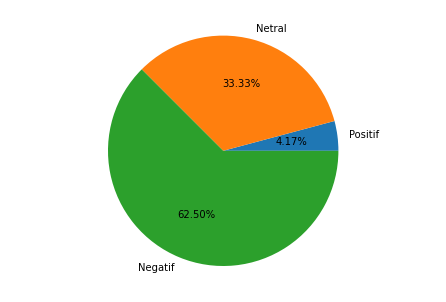

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
MataKuliah = ['Positif', 'Netral', 'Negatif']
Nilai = [positif,netral,negatif]
ax.pie(Nilai,labels=MataKuliah,autopct='%1.2f%%')
plt.show()